# Introduction
In this case, I will explore PBS KIDS data in order to understand it, and putting in practice my skills in statistics and machine learning.

To understand the data statistically, the first step that I will do is to answer the following questions:

#### Where the data come from?
The data comes from PBS KIDS Measure Up! app database. In this case, I will use is a sample.

#### Does the data come from probability sampling?
There is no much information about how the sample was collected, so the first option is to say the data does not come from probability sample. However, the goal is to build a clasification model and in order to keep this work as simple as possible I will assume that the data comes from probability.

#### If the data comes from probability sampling, what method was used?
As I said before, there is no much information about it, so, I think that it is reasonable to assume that data was collected using a simple random method.

Another important thing to say, that it is also reasonable to assume that data comes from huge amount of data, so data was collected using a without replacement method, and observations are independent and identically distributed.

#### Does the data come from non-probability sampling?
No.

#### Is the data unbiased?
It was used a simple random method, so the data is unbiased and representative of population.

#### Is the data experimental or observational?
The data is observational, so I can only get conclusions about possible associations between variables, and no causation.

## References

https://www.kaggle.com/c/data-science-bowl-2019/overview

https://www.kaggle.com/gpreda/2019-data-science-bowl-eda

https://machinelearningmastery.com/handle-missing-data-python/

https://datascience.stackexchange.com/questions/40084/how-to-deal-with-missing-data-for-bernoulli-naive-bayes

Libraries:

* Python: 3.7
* sklearn: 1.0.2
* Pandas: 1.3.5
* Numpy: 1.21.6
* scipy: 1.7.3 


# Data science methodology

## 1. Business understanding
PBS KIDS wants to gain insights into how media can help children learn important skills for success in school and life, so, PBS KIDS has four levels of success in its app.

* **3**: the assessment was solved on the first attempt.
* **2**: the assessment was solved on the second attempt.
* **1**: the assessment was solved after 3 or more attempts.
* **0**: the assessment was never solved.

With this information, the problem to solve is defined by the following question: **how to classify taks by their difficulty?** in order to add more resources to help children in difficult tasks.

## 2. Analytic approach
The goal of this stage is to determine what will be the solution.

PBS KIDS wants to classify an assessment by its difficult level using number of trials to resolve it. So, **I will recomend to handle this problem using a multi classification model**.

## 3. Data requirements
The goal of this stage is to determine what data will be used to solve the problem.

I will use data collected by PBS KIDS Mesuare Up! app, which is available. However, in order to keep privacy user information safe, I only have a sample of this data whitout any personal information.

## 4. Data collection
The goal of this stage is to determine what extraction methods and data sources will be used.

### 4.1. Data sources
Where the data come from? PBS KIDS Mesuare Up! app' databases.

### 4.2. Estraction methods:
Data population is not available, so a sample will be use to construct a model to predict **score**. For this reason, a important thing that should be known is what **probability sampling method** should be used in order to keep the data **unbiased**. In this case, there is no information about it; so, it is enough to assume that data were colleted using **random samping method and without replacement**. The main reason to assume this is that data are stored in databases, where it is easy and cheap to get a sample.

Another important point to say is that the data is observational (there are no experiments), so I will only get associations between variables and no causations.

In conclusion, there are good reasons to say that observations of sample data are **independent and identically distributed**.

In [ ]:
# Install the most recent kaggle library
!pip install kaggle

In [ ]:
# Load kaggle configuration file to set up connection
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [ ]:
# Download data
!kaggle competitions download -c data-science-bowl-2019

 97% 383M/397M [00:03<00:00, 115MB/s] 
100% 397M/397M [00:03<00:00, 108MB/s]
  0% 0.00/399k [00:00<?, ?B/s]
100% 399k/399k [00:00<00:00, 56.7MB/s]
100% 40.8M/40.8M [00:00<00:00, 45.4MB/s]

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 87.4MB/s]
  0% 0.00/10.8k [00:00<?, ?B/s]
100% 10.8k/10.8k [00:00<00:00, 11.2MB/s]


In [ ]:
!unzip /content/test.csv.zip
!unzip /content/train.csv.zip
!unzip /content/train_labels.csv.zip

Archive:  /content/test.csv.zip
  inflating: test.csv                
Archive:  /content/train.csv.zip
  inflating: train.csv               
Archive:  /content/train_labels.csv.zip
  inflating: train_labels.csv        


## 5. Data understanding
The goal of this stage is to use descriptive statistics, hypothesis testing and visualization techniques to understand the data, and to know whether this data is useful or not.

For this problem, the target variable is "accuracy_group" and my efforts will focus on finding its good predictors, in other words, to find which independent variables have a strong relationship with target variable.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pd.set_option('max_colwidth', 200)

### 5.1. Specs dataset

In [ ]:
dsSpecs = pd.read_csv('/content/specs.csv')
print('dsSpecs shape:', dsSpecs.shape)
dsSpecs.head()

dsSpecs shape: (386, 3)


,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct round attempt (pressing the go button with the correct...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round when the event takes place or 0 if no round""},{""n..."
1,df4fe8b6,The end of system-initiated feedback (Incorrect) event occurs when the game finishes delivering feedback to the player in response to an incorrect round attempt (pressing the go button with the in...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""description"",""type"":""string"",""info"":""the text or description of the instruction""},{""name"":""identifier"",""t..."
2,3babcb9b,The end of system-initiated instruction event occurs when the game finishes delivering instructions to the player. It contains information that describes the content of the instruction including d...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round when the event takes place or 0 if no round""},{""n..."
3,7f0836bf,The end of system-initiated instruction event occurs when the game finishes delivering instructions to the player. It contains information that describes the content of the instruction including d...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round when the event takes place or 0 if no round""},{""n..."
4,ab3136ba,The end of system-initiated instruction event occurs when the game finishes delivering instructions to the player. It contains information that describes the content of the instruction including d...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round when the event takes place or 0 if no round""},{""n..."


In [ ]:
dsSpecsArgs = pd.DataFrame()
for i in range(dsSpecs.shape[0]):
  for arg in json.loads(dsSpecs.loc[i, 'args']):
    dsSpecsArgs = dsSpecsArgs.append(pd.DataFrame({ 'event_id': dsSpecs.loc[i, 'event_id'], 'info': dsSpecs.loc[i, 'info'], 'name': arg['name'], 'type': arg['type'], 'info': arg['info'] }, index = [i]))

In [ ]:
dsSpecsArgs.shape

(2541, 4)

In [ ]:
dsSpecsArgs.head()

,event_id,info,name,type
0,2b9272f4,millisecond count since start of game,game_time,int
0,2b9272f4,number of the current round when the event takes place or 0 if no round,round,int
0,2b9272f4,number of the current level when the event takes place or 0 if no level,level,int
0,2b9272f4,the text or description of the instruction,description,string
0,2b9272f4,a unique identifier for this piece of instruction,identifier,string


In [ ]:
dsSpecsArgsCount =  dsSpecsArgs[['event_id', 'name']].groupby(['name']).count().reset_index()
dsSpecsArgsCount.rename(columns = { 'event_id': 'count' }, inplace = True)
dsSpecsArgsCount.sort_values(by = 'count', ascending = False, inplace = True)
print(dsSpecsArgsCount.shape)
dsSpecsArgsCount.head()

(122, 2)


,name,count
40,event_count,386
39,event_code,386
45,game_time,385
86,round,220
36,duration,132


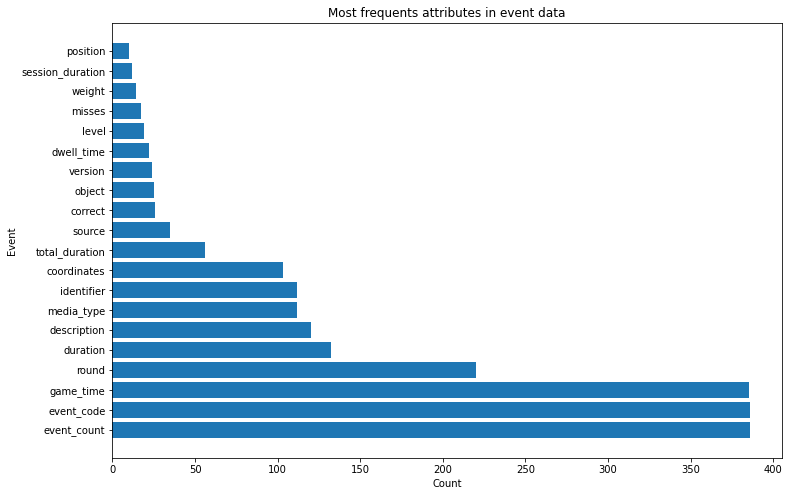

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.barh(y = dsSpecsArgsCount.head(20)['name'], width = dsSpecsArgsCount.head(20)['count'])
ax.set_xlabel('Count')
ax.set_ylabel('Event')
plt.title('Most frequents attributes in event data')
plt.show()

In [ ]:
del dsSpecsArgsCount

### 5.2.Train labels dataset
Variables:
* **game_session**: identifier of a session.
* **installation_id**: identifier of an application instance.
* **title**: title of a game or video.
* **num_correct**: number of successful trials. 
* **num_incorrect**: number of unsuccessful trials.
* **accuracy**: num_correct / (num_correct + num_incorrect)
* **accuracy_group**: type of outcome.
 * **3**: the assessment was solved on the first attempt.
 * **2**: the assessment was solved on the second attempt.
 * **1**: the assessment was solved after 3 or more attempts.
 * **0**: the assessment was never solved.

#### 5.2.1. Load data

In [ ]:
dsTrainLabels = pd.read_csv('/content/train_labels.csv')
print('Shape:', dsTrainLabels.shape)
dsTrainLabels.head()

Shape: (17690, 7)


,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


#### 5.2.2. Exploratory data analysis

##### 5.2.2.1. Get general information

* There are 17690 observations and 7 variables. The amount of data is large, so, my estimate parameters will be close to population parameters in inferential statesment (less sampling error).
* There are no missing values.

In [ ]:
dsTrainLabels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17690 entries, 0 to 17689
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_session     17690 non-null  object 
 1   installation_id  17690 non-null  object 
 2   title            17690 non-null  object 
 3   num_correct      17690 non-null  int64  
 4   num_incorrect    17690 non-null  int64  
 5   accuracy         17690 non-null  float64
 6   accuracy_group   17690 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 967.5+ KB


Most assessments were revolved at first trial.

In [ ]:
dsTotalSessions = dsTrainLabels[['accuracy_group', 'game_session']].groupby(['accuracy_group']).count().reset_index()
dsTotalSessions = dsTotalSessions.rename(columns = { 'game_session': 'count' })
dsTotalSessions.sort_values(by = 'count', ascending = False)

,accuracy_group,count
3,3,8845
0,0,4229
1,1,2411
2,2,2205


##### 5.2.2.2. Explore relationship between variables

##### 5.2.2.2.1. Title variable

In [ ]:
# Calculate number of game sessions by title
dsTrainLabels[['title', 'game_session']].groupby('title').count().reset_index()

,title,game_session
0,Bird Measurer (Assessment),2746
1,Cart Balancer (Assessment),4151
2,Cauldron Filler (Assessment),4055
3,Chest Sorter (Assessment),2981
4,Mushroom Sorter (Assessment),3757


In [ ]:
dsTrainLabels[['title', 'accuracy_group', 
               'game_session']].groupby(['title', 'accuracy_group']).count().reset_index().pivot(index = 'title', columns = 'accuracy_group', values = 'game_session')

accuracy_group,0,1,2,3
title,,,,
Bird Measurer (Assessment),886,778,389,693
Cart Balancer (Assessment),576,353,470,2752
Cauldron Filler (Assessment),421,459,630,2545
Chest Sorter (Assessment),1752,466,256,507
Mushroom Sorter (Assessment),594,355,460,2348


Hypothesis testing

Showing the previous summary tables, I can see that title "Chest Sorter (Assessment)" is the most difficult assessment, and "Cart Balancer (Assessment)" is the easiest. However, these results could have been got by chance; so, to confirm it, I will use **chi-square** test for a two-way table.

* **Null hypothesis**: there is no difference in the difficulty of the all titles.
* **Alternative hypothesis**: there is some difference in the difficulty of the all titles.

In [ ]:
# Significance level
alpha = 0.05

chiSquareTest = 0
dsTrainPivot = dsTrainLabels[['title', 'accuracy_group', 
               'game_session']].groupby(['title', 'accuracy_group']).count().reset_index().pivot(index = 'title', columns = 'accuracy_group', values = 'game_session')

# Calculate chi-square test
for r in range(dsTrainPivot.values.shape[0]):
  for c in range(dsTrainPivot.values.shape[1]):
    expectedCount = dsTrainPivot.values[r, :].sum() * dsTrainPivot.values[:, c].sum() / dsTrainPivot.values.sum()
    chiSquareTest = chiSquareTest + ((dsTrainPivot.values[r, c] - expectedCount)**2) / expectedCount
print('Chi-square test:', chiSquareTest)

# Calculate degrees of freedom
df = (dsTrainPivot.shape[0] - 1) * (dsTrainPivot.shape[1] - 1)
print('Degrees of freedom', df)

# Calculate p-value
p_value = 1 - stats.chi2.cdf(chiSquareTest, df = df)
print('p-value:', p_value)

if p_value < alpha:
  print('Conclusion:', 'There is enough evidence to reject null hypothesis, and to say that variable accuracy_group and variable title are associated.')
else:
  print('Conclusion:', 'There is not enough evidence to reject null hypothesis, and to say that variable accuracy_group and variable title are not associated.')

del dsTrainPivot

Chi-square test: 4305.581107337478
Degrees of freedom 12
p-value: 0.0
Conclusion: There is enough evidence to reject null hypothesis, and to say that variable accuracy_group and variable title are associated.


##### 5.2.2.2.2. Accuracy variable
It is easy to see that accuracy variable is a result to operate num_correct and num_incorrect variables (num_correct / (num_correct + num_incorrect)), so I can remove the last two.

Another observation that I can see is the relationship between accuracy and accuracy_group, they are equal, but using difference scale. For example, accuracy equal 1 has accuracy_group equal 3. This variable is interesting, but I will not use it, because this variable does not exist in Test Data, and I need that both dataset have the same number of variables.



In [ ]:
dsTrainLabels = dsTrainLabels[['game_session', 'installation_id', 'title', 'accuracy', 'accuracy_group']]
dsTrainLabels.head()

,game_session,installation_id,title,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1.0,3


In [ ]:
dsTrainLabels[['accuracy_group', 'accuracy']].groupby(['accuracy_group']).agg(['mean', 'std', 'median', 'count']).reset_index()

accuracy_group  accuracy                       
                      mean       std median count
0              0  0.000000  0.000000   0.00  4229
1              1  0.245702  0.084434   0.25  2411
2              2  0.500000  0.000000   0.50  2205
3              3  1.000000  0.000000   1.00  8845

In [ ]:
dsTrainLabels = dsTrainLabels.drop('accuracy', axis=1)

##### 5.2.2.2.3. Other variables
* **game_session**: this variable is used to identify each observation, so, I will not use like predictor; however, I need it to join with other datasets.
* **installation_id**: this variable does not tell me much about the behavior of target variable; however, I need it to join with other datasets.

In [ ]:
dsTrainLabels.head()

,game_session,installation_id,title,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),3


### 5.3.Train dataset

#### 5.3.1. Load data

In [ ]:
dsTrain = pd.read_csv('/content/train.csv')
print(dsTrain.shape)
dsTrain.head()

(11341042, 11)


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0,""event_code"":2000}",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""identifier"":""Dot_LetsSandcastle,Dot_FillMold,Dot_Mol...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""identifier"":""Dot_LetsSandcastle,Dot_FillMold,Dot_Mol...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


#### 5.3.2. Exploratory data analysis
As the problem says no all data is useful. I have to filter the data by type assessment and event_code 4100 or 4110.

##### 5.3.2.1. Get general information
* There are 11341042 observations and 11 features.
* There are no missing values.

In [ ]:
dsTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341042 entries, 0 to 11341041
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   event_id         object
 1   game_session     object
 2   timestamp        object
 3   event_data       object
 4   installation_id  object
 5   event_count      int64 
 6   event_code       int64 
 7   game_time        int64 
 8   title            object
 9   type             object
 10  world            object
dtypes: int64(3), object(8)
memory usage: 951.8+ MB


##### 5.3.2.2. Get useful data
Objectives:
* Filter by type equal assessment and event_code 4100 and 4110.

In [ ]:
# Get instances that have had at least one session with type assessment
keepIds = (dsTrain[dsTrain['type'] == 'Assessment']['installation_id']).drop_duplicates()

# Filter by instances
dsTrainAssessment = pd.merge(dsTrain, keepIds, how = 'inner', on = 'installation_id')
print(dsTrainAssessment.shape)
dsTrainAssessment.head()

(8294138, 11)


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,34ba1a28d02ba8ba,2019-08-06T04:57:18.904Z,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,4b57c9a59474a1b9,2019-08-06T04:57:45.301Z,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,2b9d5af79bcdb79f,2019-08-06T04:58:14.538Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0,""event_code"":2000}",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,2b9d5af79bcdb79f,2019-08-06T04:58:14.615Z,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""identifier"":""Dot_LetsSandcastle,Dot_FillMold,Dot_Mol...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1325467d,2b9d5af79bcdb79f,2019-08-06T04:58:16.680Z,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":1015,""stage_height"":762},""event_count"":3,""game_time"":2137,""event_code"":4070}",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [ ]:
# Filter attempts assessments by 4100 and 4110 event code
dsTrainAssessment = dsTrainAssessment[
    ((dsTrainAssessment['type'] == 'Assessment') & (dsTrainAssessment['event_code'] == 4100) & (dsTrainAssessment['title'] != 'Bird Measurer (Assessment)')) |
    ((dsTrainAssessment['type'] == 'Assessment') & (dsTrainAssessment['event_code'] == 4110) & (dsTrainAssessment['title'] == 'Bird Measurer (Assessment)'))
]
print(dsTrainAssessment.shape)
dsTrainAssessment.head()

(41549, 11)


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
690,25fa8af4,901acc108f55a5a1,2019-08-06T05:22:32.357Z,"{""correct"":true,""stumps"":[1,2,4],""event_count"":44,""game_time"":31011,""event_code"":4100}",0006a69f,44,4100,31011,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
1171,17113b36,77b8ee947eb84b4e,2019-08-06T05:35:54.898Z,"{""correct"":false,""caterpillars"":[11,8,3],""event_count"":29,""game_time"":35771,""event_code"":4110}",0006a69f,29,4110,35771,Bird Measurer (Assessment),Assessment,TREETOPCITY
1177,17113b36,77b8ee947eb84b4e,2019-08-06T05:36:01.927Z,"{""correct"":false,""caterpillars"":[11,8,11],""event_count"":35,""game_time"":42805,""event_code"":4110}",0006a69f,35,4110,42805,Bird Measurer (Assessment),Assessment,TREETOPCITY
1182,17113b36,77b8ee947eb84b4e,2019-08-06T05:36:06.512Z,"{""correct"":false,""caterpillars"":[11,8,5],""event_count"":40,""game_time"":47388,""event_code"":4110}",0006a69f,40,4110,47388,Bird Measurer (Assessment),Assessment,TREETOPCITY
1187,17113b36,77b8ee947eb84b4e,2019-08-06T05:36:09.739Z,"{""correct"":false,""caterpillars"":[11,8,7],""event_count"":45,""game_time"":50605,""event_code"":4110}",0006a69f,45,4110,50605,Bird Measurer (Assessment),Assessment,TREETOPCITY


Split event data

Due to specs dataset analisis, each event_id has different attributes which have different information. This information is stored in event_data variable in train dataset. So, to process this data I will split event_data and analyse them separately.

In [ ]:
dsTrainAssessment['event_id'].unique()

array(['25fa8af4', '17113b36', '392e14df', 'd122731b', '93b353f2'],
      dtype=object)

In [ ]:
# Create is_successful variable to know which observation is correct
dsTrainAssessment['is_successful'] = dsTrainAssessment['event_data'].map(lambda x: json.loads(x)['correct'])

In [ ]:
def getColumnStumps(x, operation = 'mean'):
  eventData = json.loads(x)
  if 'stumps' in eventData.keys():
    if operation == 'mean':
      result = np.mean(eventData['stumps'])
      result = 0 if np.isnan(result) else result 
      return result
    else:
      result = np.median(eventData['stumps'])
      result = 0 if np.isnan(result) else result 
      return result
  else:
    return np.nan

In [ ]:
def getColumnCaterpillars(x, operation = 'mean'):
  eventData = json.loads(x)
  if 'caterpillars' in eventData.keys():
    if operation == 'mean':
      result = np.mean(eventData['caterpillars'])
      result = 0 if np.isnan(result) else result 
      return result
    else:
      result = np.median(eventData['caterpillars'])
      result = 0 if np.isnan(result) else result 
      return result
  else:
    return np.nan

In [ ]:
def getColumnPillars(x, operation = 'mean'):
  eventData = json.loads(x)
  if 'pillars' in eventData.keys():
    if operation == 'mean':
      result = np.mean(eventData['pillars'])
      result = 0 if np.isnan(result) else result 
      return result
    else:
      result = np.median(eventData['pillars'])
      result = 0 if np.isnan(result) else result 
      return result
  else:
    return np.nan

In [ ]:
def getColumnBuckets(x, operation = 'mean'):
  eventData = json.loads(x)
  if 'buckets' in eventData.keys():
    if operation == 'mean':
      result = np.mean(eventData['buckets'])
      result = 0 if np.isnan(result) else result 
      return result
    else:
      result = np.median(eventData['buckets'])
      result = 0 if np.isnan(result) else result 
      return result
  else:
    return np.nan

In [ ]:
def getColumnBuckets_placed(x, operation = 'mean'):
  eventData = json.loads(x)
  if 'buckets_placed' in eventData.keys():
    if operation == 'mean':
      result = np.mean(eventData['buckets_placed'])
      result = 0 if np.isnan(result) else result 
      return result
    else:
      result = np.median(eventData['buckets_placed'])
      result = 0 if np.isnan(result) else result 
      return result
  else:
    return np.nan

In [ ]:
def getColumnDuration(x):
  eventData = json.loads(x)
  if 'duration' in eventData.keys():
    return 0 if np.isnan(eventData['duration']) else eventData['duration']
  else:
    return np.nan

In [ ]:
def getLeftColumnCrystals(x, operation = 'mean'):
  eventData = json.loads(x)
  if 'left' in eventData.keys():
    crystals = eventData['left']
    weights = []
    for c in crystals:
      weights.append(c['weight'])

    if operation == 'mean':
      result = np.mean(weights)
      result = 0 if np.isnan(result) else result 
      return result
    else:
      result = np.median(weights)
      result = 0 if np.isnan(result) else result 
      return result

    return result
  else:
    return np.nan

In [ ]:
def getRightColumnCrystals(x, operation = 'mean'):
  eventData = json.loads(x)
  if 'right' in eventData.keys():
    crystals = eventData['right']
    weights = []
    for c in crystals:
      weights.append(c['weight'])

    if operation == 'mean':
      result = np.mean(weights)
      result = 0 if np.isnan(result) else result 
      return result
    else:
      result = np.median(weights)
      result = 0 if np.isnan(result) else result 
      return result

    return result
  else:
    return np.nan

In [ ]:
dsTrainAssessment['stumps'] = dsTrainAssessment['event_data'].apply(getColumnStumps)
dsTrainAssessment['caterpillars'] = dsTrainAssessment['event_data'].apply(getColumnCaterpillars)
dsTrainAssessment['pillars'] = dsTrainAssessment['event_data'].apply(getColumnPillars)
dsTrainAssessment['buckets'] = dsTrainAssessment['event_data'].apply(getColumnBuckets)
dsTrainAssessment['buckets_placed'] = dsTrainAssessment['event_data'].apply(getColumnBuckets_placed)
dsTrainAssessment['duration'] = dsTrainAssessment['event_data'].apply(getColumnDuration)
dsTrainAssessment['left_crystals'] = dsTrainAssessment['event_data'].apply(getLeftColumnCrystals)
dsTrainAssessment['right_crystals'] = dsTrainAssessment['event_data'].apply(getRightColumnCrystals)
print(dsTrainAssessment.shape)
dsTrainAssessment.head()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


(41549, 20)


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,is_successful,stumps,caterpillars,pillars,buckets,buckets_placed,duration,left_crystals,right_crystals
690,25fa8af4,901acc108f55a5a1,2019-08-06T05:22:32.357Z,"{""correct"":true,""stumps"":[1,2,4],""event_count"":44,""game_time"":31011,""event_code"":4100}",0006a69f,44,4100,31011,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,True,2.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1171,17113b36,77b8ee947eb84b4e,2019-08-06T05:35:54.898Z,"{""correct"":false,""caterpillars"":[11,8,3],""event_count"":29,""game_time"":35771,""event_code"":4110}",0006a69f,29,4110,35771,Bird Measurer (Assessment),Assessment,TREETOPCITY,False,NaN,7.333333,NaN,NaN,NaN,NaN,NaN,NaN
1177,17113b36,77b8ee947eb84b4e,2019-08-06T05:36:01.927Z,"{""correct"":false,""caterpillars"":[11,8,11],""event_count"":35,""game_time"":42805,""event_code"":4110}",0006a69f,35,4110,42805,Bird Measurer (Assessment),Assessment,TREETOPCITY,False,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
1182,17113b36,77b8ee947eb84b4e,2019-08-06T05:36:06.512Z,"{""correct"":false,""caterpillars"":[11,8,5],""event_count"":40,""game_time"":47388,""event_code"":4110}",0006a69f,40,4110,47388,Bird Measurer (Assessment),Assessment,TREETOPCITY,False,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
1187,17113b36,77b8ee947eb84b4e,2019-08-06T05:36:09.739Z,"{""correct"":false,""caterpillars"":[11,8,7],""event_count"":45,""game_time"":50605,""event_code"":4110}",0006a69f,45,4110,50605,Bird Measurer (Assessment),Assessment,TREETOPCITY,False,NaN,8.666667,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
del dsTrain, keepIds

##### 5.3.2.3. Explore distribution of the variables
First actions:
* I will remove timestamp variable, because I have a better variable to mesuare the time, in this case is game_time.
* I will remove event_data variable, because I have already the information.
* I will remove event_count variable, because this variable is only a count.
* I will remove event_code variable, because all observations have the same value.
* I will remove type variable, because all observations have the same value.

In [ ]:
dsTrainAssessment = dsTrainAssessment[['event_id', 'game_session', 'installation_id', 'game_time', 'title', 'world', 'is_successful', 
                                       'stumps', 'caterpillars', 'pillars', 'buckets', 'buckets_placed', 'duration', 'left_crystals', 'right_crystals']]
dsTrainAssessment.head()

,event_id,game_session,installation_id,game_time,title,world,is_successful,stumps,caterpillars,pillars,buckets,buckets_placed,duration,left_crystals,right_crystals
690,25fa8af4,901acc108f55a5a1,0006a69f,31011,Mushroom Sorter (Assessment),TREETOPCITY,True,2.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1171,17113b36,77b8ee947eb84b4e,0006a69f,35771,Bird Measurer (Assessment),TREETOPCITY,False,NaN,7.333333,NaN,NaN,NaN,NaN,NaN,NaN
1177,17113b36,77b8ee947eb84b4e,0006a69f,42805,Bird Measurer (Assessment),TREETOPCITY,False,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
1182,17113b36,77b8ee947eb84b4e,0006a69f,47388,Bird Measurer (Assessment),TREETOPCITY,False,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
1187,17113b36,77b8ee947eb84b4e,0006a69f,50605,Bird Measurer (Assessment),TREETOPCITY,False,NaN,8.666667,NaN,NaN,NaN,NaN,NaN,NaN


##### 5.3.2.3.1. Explore title, world and event_id variables
* event_id and title have a relationship one-to-one, so I can remove one of them.
* In case of world variable, the relationship is not clear, so I will keep it.

In [ ]:
dsTrainAssessment['world'].unique()

array(['TREETOPCITY', 'MAGMAPEAK', 'CRYSTALCAVES'], dtype=object)

In [ ]:
dsTrainAssessment[['event_id', 'world', 'game_time']].groupby(['world', 'event_id']).count().reset_index()

,world,event_id,game_time
0,CRYSTALCAVES,93b353f2,9967
1,CRYSTALCAVES,d122731b,6697
2,MAGMAPEAK,392e14df,7468
3,TREETOPCITY,17113b36,11158
4,TREETOPCITY,25fa8af4,6259


In [ ]:
dsTrainAssessment[['event_id', 'title', 'game_time']].groupby(['event_id', 'title']).count().reset_index()

,event_id,title,game_time
0,17113b36,Bird Measurer (Assessment),11158
1,25fa8af4,Mushroom Sorter (Assessment),6259
2,392e14df,Cauldron Filler (Assessment),7468
3,93b353f2,Chest Sorter (Assessment),9967
4,d122731b,Cart Balancer (Assessment),6697


##### 5.3.2.3.2. Explore variable by title
When I explored train_labels dataset I could find that this dataset is made by a summary by game_session. So, I will make a groupby in train dataset by game_session.

In [ ]:
# Get available event_id
dsTrainAssessment['event_id'].unique()

array(['25fa8af4', '17113b36', '392e14df', 'd122731b', '93b353f2'],
      dtype=object)

Validate if there are missing values for each event_id. In this case, each event_id has its own variable, bacause of event_data.

In [ ]:
dsTrainAssessment[dsTrainAssessment['event_id'] == '25fa8af4']['stumps'].isna().sum()

0

In [ ]:
dsTrainAssessment[dsTrainAssessment['event_id'] == '17113b36']['caterpillars'].isna().sum()

0

In [ ]:
dsTrainAssessment[dsTrainAssessment['event_id'] == '392e14df'][['buckets', 'buckets_placed', 'duration']].isna().sum()

buckets           0
buckets_placed    0
duration          0
dtype: int64

In [ ]:
dsTrainAssessment[dsTrainAssessment['event_id'] == 'd122731b'][['left_crystals', 'right_crystals']].isna().sum()

left_crystals     0
right_crystals    0
dtype: int64

In [ ]:
dsTrainAssessment[dsTrainAssessment['event_id'] == '93b353f2']['pillars'].isna().sum()

0

Group by mean

In [ ]:
dsTrainAssessmentMean = dsTrainAssessment.groupby(['event_id', 'installation_id', 'world', 'game_session', 'title']).mean().reset_index()
print(dsTrainAssessmentMean.shape)
dsTrainAssessmentMean.head()

(17690, 15)


,event_id,installation_id,world,game_session,title,game_time,is_successful,stumps,caterpillars,pillars,buckets,buckets_placed,duration,left_crystals,right_crystals
0,17113b36,0006a69f,TREETOPCITY,77b8ee947eb84b4e,Bird Measurer (Assessment),60107.727273,0.0,NaN,7.333333,NaN,NaN,NaN,NaN,NaN,NaN
1,17113b36,0006a69f,TREETOPCITY,a9ef3ecb3d1acc6a,Bird Measurer (Assessment),13050.000000,1.0,NaN,5.666667,NaN,NaN,NaN,NaN,NaN,NaN
2,17113b36,0006c192,TREETOPCITY,957406a905d59afd,Bird Measurer (Assessment),28489.000000,0.5,NaN,5.500000,NaN,NaN,NaN,NaN,NaN,NaN
3,17113b36,00129856,TREETOPCITY,ae691ec5ad5652cf,Bird Measurer (Assessment),12599.000000,1.0,NaN,5.666667,NaN,NaN,NaN,NaN,NaN,NaN
4,17113b36,001d0ed0,TREETOPCITY,7b536271e99518f0,Bird Measurer (Assessment),32571.000000,0.0,NaN,10.866667,NaN,NaN,NaN,NaN,NaN,NaN


Join with train_labels dataset

In [ ]:
dsTrainMerge = pd.merge(dsTrainAssessmentMean, dsTrainLabels, how = 'inner', on = ['installation_id', 'game_session', 'title'])
print(dsTrainMerge.shape)
dsTrainMerge.head()

(17690, 16)


,event_id,installation_id,world,game_session,title,game_time,is_successful,stumps,caterpillars,pillars,buckets,buckets_placed,duration,left_crystals,right_crystals,accuracy_group
0,17113b36,0006a69f,TREETOPCITY,77b8ee947eb84b4e,Bird Measurer (Assessment),60107.727273,0.0,NaN,7.333333,NaN,NaN,NaN,NaN,NaN,NaN,0
1,17113b36,0006a69f,TREETOPCITY,a9ef3ecb3d1acc6a,Bird Measurer (Assessment),13050.000000,1.0,NaN,5.666667,NaN,NaN,NaN,NaN,NaN,NaN,3
2,17113b36,0006c192,TREETOPCITY,957406a905d59afd,Bird Measurer (Assessment),28489.000000,0.5,NaN,5.500000,NaN,NaN,NaN,NaN,NaN,NaN,2
3,17113b36,00129856,TREETOPCITY,ae691ec5ad5652cf,Bird Measurer (Assessment),12599.000000,1.0,NaN,5.666667,NaN,NaN,NaN,NaN,NaN,NaN,3
4,17113b36,001d0ed0,TREETOPCITY,7b536271e99518f0,Bird Measurer (Assessment),32571.000000,0.0,NaN,10.866667,NaN,NaN,NaN,NaN,NaN,NaN,0


Observations
* As I said before, I will remove event_id variable, bacause it is the same that title variable.
* I will remove is_successful variable, because it has the same behavior that accuracy.
* I will remove installation_id and game_session variables, bacause they are only ids.

In [ ]:
dsTrainMerge = dsTrainMerge[['world', 'title', 'game_time', 'stumps', 
                             'caterpillars', 'pillars', 'buckets', 'buckets_placed', 'duration', 'left_crystals', 'right_crystals', 'accuracy_group']]
print(dsTrainMerge.shape)
dsTrainMerge.head()

(17690, 12)


,world,title,game_time,stumps,caterpillars,pillars,buckets,buckets_placed,duration,left_crystals,right_crystals,accuracy_group
0,TREETOPCITY,Bird Measurer (Assessment),60107.727273,NaN,7.333333,NaN,NaN,NaN,NaN,NaN,NaN,0
1,TREETOPCITY,Bird Measurer (Assessment),13050.000000,NaN,5.666667,NaN,NaN,NaN,NaN,NaN,NaN,3
2,TREETOPCITY,Bird Measurer (Assessment),28489.000000,NaN,5.500000,NaN,NaN,NaN,NaN,NaN,NaN,2
3,TREETOPCITY,Bird Measurer (Assessment),12599.000000,NaN,5.666667,NaN,NaN,NaN,NaN,NaN,NaN,3
4,TREETOPCITY,Bird Measurer (Assessment),32571.000000,NaN,10.866667,NaN,NaN,NaN,NaN,NaN,NaN,0


##### 5.3.2.3.3. Explorer new variables relationship

game_time exploration
* This variable has a extremly rigth skewed distribution, so I will remove some outliers in order to reduce the noise in the data. That means to lose 1421 observations. 
* Additionally, accuracy_group 3 has the most amount of observations and it will lose the least amount of outliers (2%). This process can produce an imbalanced class problem; so, I will have to use some methods to balance the data (transformation step).

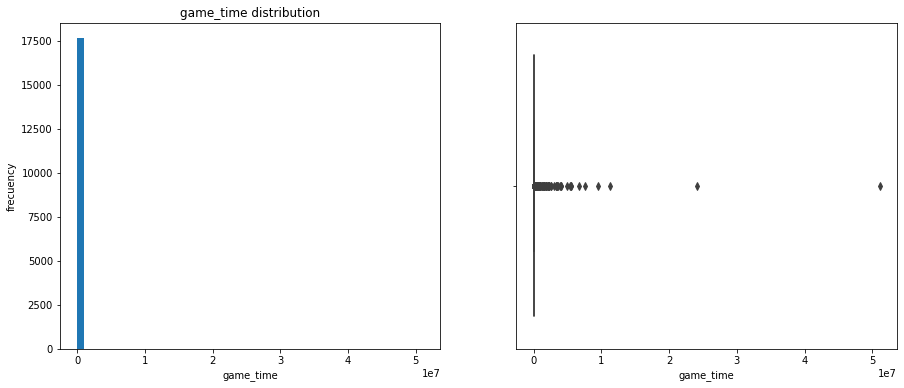

In [ ]:
fig, (ax11, ax12) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax11.hist(dsTrainMerge['game_time'], bins = 50)
ax11.set_xlabel('game_time')
ax11.set_ylabel('frecuency')
ax11.set_title('game_time distribution')

sns.boxplot(x = 'game_time', data = dsTrainMerge, ax = ax12)

plt.show()

In [ ]:
# Calculate percentage of outliers by accuracy_group
dsTrainSummary = dsTrainMerge[['game_time', 'accuracy_group']].groupby(['accuracy_group']).count().reset_index()
dsTrainSummary['game_time_outliers'] = dsTrainMerge[dsTrainMerge['game_time'] >= 60000][['game_time', 'accuracy_group']].groupby(['accuracy_group']).count().reset_index()['game_time']
dsTrainSummary['game_time_outliers'] = round(dsTrainSummary['game_time_outliers'] / dsTrainSummary['game_time'], 2)
dsTrainSummary

,accuracy_group,game_time,game_time_outliers
0,0,4229,0.15
1,1,2411,0.18
2,2,2205,0.05
3,3,8845,0.02


In [ ]:
# Show outliers
dsTrainMerge[dsTrainMerge['game_time'] >= 60000][['world', 'title', 'game_time', 'accuracy_group']].groupby(['world', 'title', 'accuracy_group']).count().reset_index()

,world,title,accuracy_group,game_time
0,CRYSTALCAVES,Cart Balancer (Assessment),0,100
1,CRYSTALCAVES,Cart Balancer (Assessment),1,89
2,CRYSTALCAVES,Cart Balancer (Assessment),2,43
3,CRYSTALCAVES,Cart Balancer (Assessment),3,89
4,CRYSTALCAVES,Chest Sorter (Assessment),0,298
5,CRYSTALCAVES,Chest Sorter (Assessment),1,102
6,CRYSTALCAVES,Chest Sorter (Assessment),2,32
7,CRYSTALCAVES,Chest Sorter (Assessment),3,41
8,MAGMAPEAK,Cauldron Filler (Assessment),0,25
9,MAGMAPEAK,Cauldron Filler (Assessment),1,28


In [ ]:
dsTrainMerge = dsTrainMerge[dsTrainMerge['game_time'] < 60000]

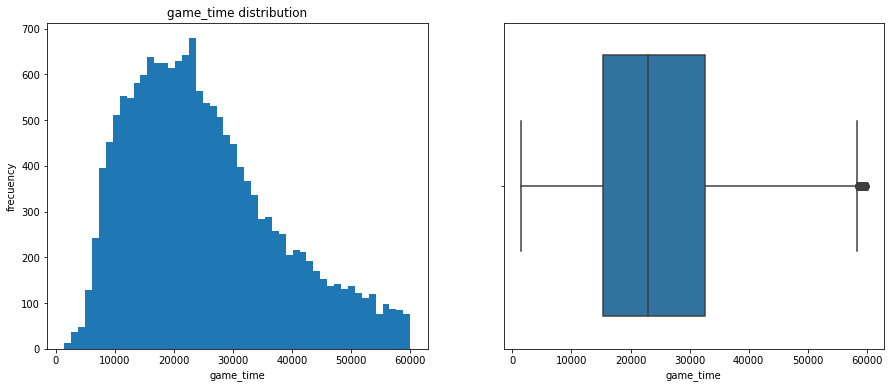

In [ ]:
fig, (ax11, ax12) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax11.hist(dsTrainMerge['game_time'], bins = 50)
ax11.set_xlabel('game_time')
ax11.set_ylabel('frecuency')
ax11.set_title('game_time distribution')

sns.boxplot(x = 'game_time', data = dsTrainMerge, ax = ax12)

plt.show()

Explore data by title

Bird Measurer

In [ ]:
dsTrainMerge[dsTrainMerge['title'] == 'Bird Measurer (Assessment)'][['accuracy_group', 'caterpillars']].groupby('accuracy_group').agg(['mean', 'std']).reset_index()

accuracy_group caterpillars          
                         mean       std
0              0     5.927430  2.774929
1              1     5.890281  1.105476
2              2     5.716931  0.772712
3              3     5.666667  0.000000

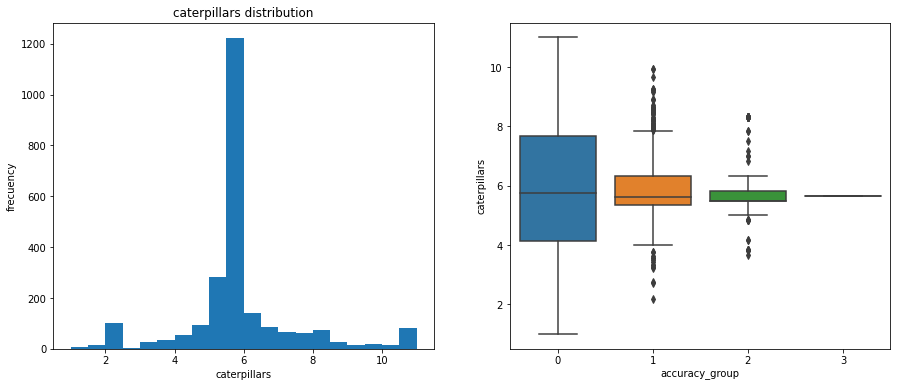

In [ ]:
fig, (ax11, ax12) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax11.hist(dsTrainMerge[dsTrainMerge['title'] == 'Bird Measurer (Assessment)']['caterpillars'], bins = 20)
ax11.set_xlabel('caterpillars')
ax11.set_ylabel('frecuency')
ax11.set_title('caterpillars distribution')

sns.boxplot(x = 'accuracy_group', y = 'caterpillars', data = dsTrainMerge[dsTrainMerge['title'] == 'Bird Measurer (Assessment)'], ax = ax12)

plt.show()

Mushroom Sorter

In [ ]:
dsTrainMerge[dsTrainMerge['title'] == 'Mushroom Sorter (Assessment)'][['accuracy_group', 'stumps']].groupby('accuracy_group').agg(['mean', 'std']).reset_index()

accuracy_group    stumps          
                      mean       std
0              0  1.912526  1.331234
1              1  2.720693  0.797791
2              2  2.738749  0.791747
3              3  2.866754  0.577991

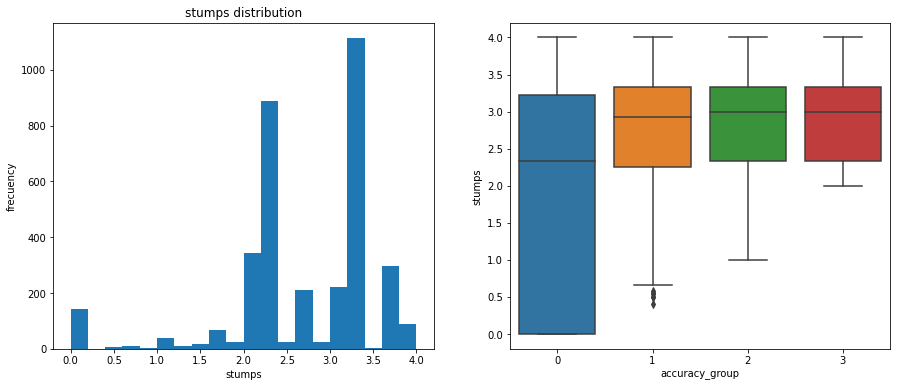

In [ ]:
fig, (ax11, ax12) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax11.hist(dsTrainMerge[dsTrainMerge['title'] == 'Mushroom Sorter (Assessment)']['stumps'], bins = 20)
ax11.set_xlabel('stumps')
ax11.set_ylabel('frecuency')
ax11.set_title('stumps distribution')

sns.boxplot(x = 'accuracy_group', y = 'stumps', data = dsTrainMerge[dsTrainMerge['title'] == 'Mushroom Sorter (Assessment)'], ax = ax12)

plt.show()

Cauldron Filler

In [ ]:
dsTrainMerge[dsTrainMerge['title'] == 'Cauldron Filler (Assessment)'][['accuracy_group', 'buckets']].groupby('accuracy_group').agg(['mean', 'std']).reset_index()

accuracy_group   buckets          
                      mean       std
0              0  1.239333  0.864788
1              1  0.570034  0.575763
2              2  0.271972  0.433061
3              3  0.000000  0.000000

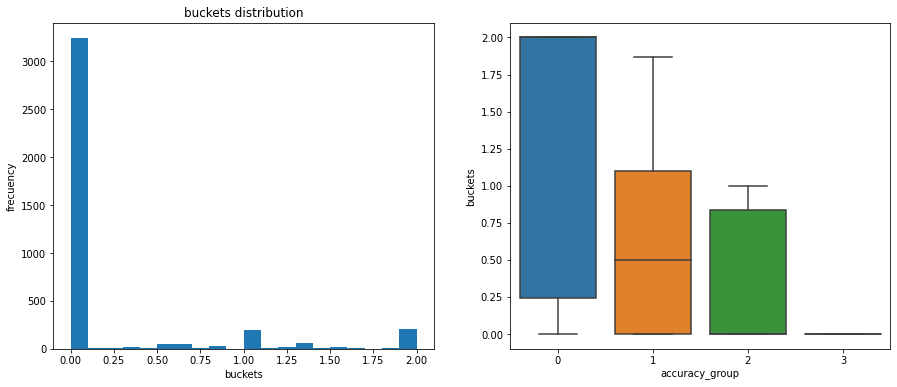

In [ ]:
fig, (ax11, ax12) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax11.hist(dsTrainMerge[dsTrainMerge['title'] == 'Cauldron Filler (Assessment)']['buckets'], bins = 20)
ax11.set_xlabel('buckets')
ax11.set_ylabel('frecuency')
ax11.set_title('buckets distribution')

sns.boxplot(x = 'accuracy_group', y = 'buckets', data = dsTrainMerge[dsTrainMerge['title'] == 'Cauldron Filler (Assessment)'], ax = ax12)

plt.show()

In [ ]:
dsTrainMerge[dsTrainMerge['title'] == 'Cauldron Filler (Assessment)'][['accuracy_group', 'buckets_placed']].groupby('accuracy_group').agg(['mean', 'std']).reset_index()

accuracy_group buckets_placed          
                           mean       std
0              0       0.759771  0.864113
1              1       1.428789  0.575853
2              2       1.727492  0.432930
3              3       2.000000  0.000000

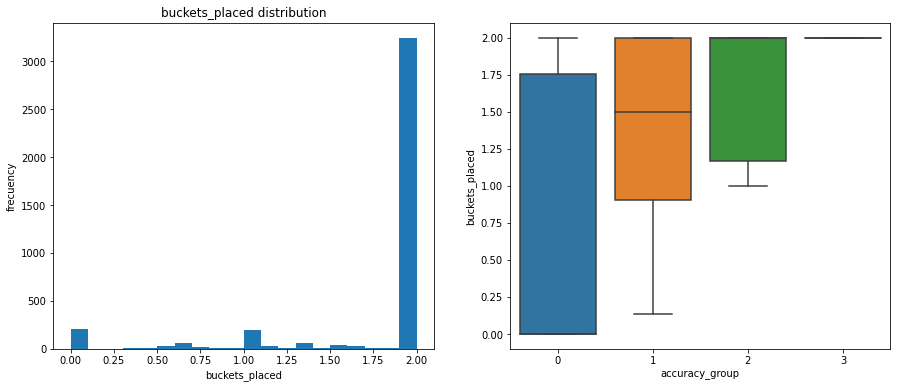

In [ ]:
fig, (ax11, ax12) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax11.hist(dsTrainMerge[dsTrainMerge['title'] == 'Cauldron Filler (Assessment)']['buckets_placed'], bins = 20)
ax11.set_xlabel('buckets_placed')
ax11.set_ylabel('frecuency')
ax11.set_title('buckets_placed distribution')

sns.boxplot(x = 'accuracy_group', y = 'buckets_placed', data = dsTrainMerge[dsTrainMerge['title'] == 'Cauldron Filler (Assessment)'], ax = ax12)

plt.show()

In [ ]:
dsTrainMerge[dsTrainMerge['title'] == 'Cauldron Filler (Assessment)'][['accuracy_group', 'duration']].groupby('accuracy_group').agg(['mean', 'std']).reset_index()

accuracy_group      duration              
                          mean           std
0              0  19383.907153  12174.634825
1              1  26415.817825  11658.591217
2              2  20443.500804   8397.454323
3              3  16032.591377   7920.342993

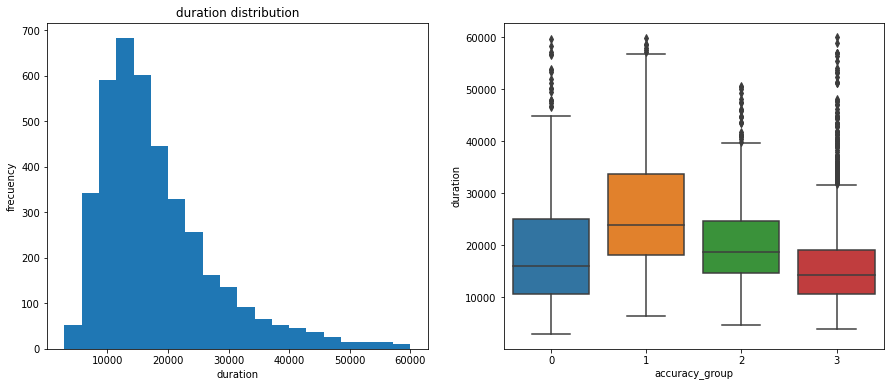

In [ ]:
fig, (ax11, ax12) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax11.hist(dsTrainMerge[dsTrainMerge['title'] == 'Cauldron Filler (Assessment)']['duration'], bins = 20)
ax11.set_xlabel('duration')
ax11.set_ylabel('frecuency')
ax11.set_title('duration distribution')

sns.boxplot(x = 'accuracy_group', y = 'duration', data = dsTrainMerge[dsTrainMerge['title'] == 'Cauldron Filler (Assessment)'], ax = ax12)

plt.show()

In [ ]:
dsTrainMerge[dsTrainMerge['title'] == 'Cauldron Filler (Assessment)'][['buckets', 'buckets_placed', 'duration']].corr()

,buckets,buckets_placed,duration
buckets,1.000000,-0.999900,0.050243
buckets_placed,-0.999900,1.000000,-0.050786
duration,0.050243,-0.050786,1.000000


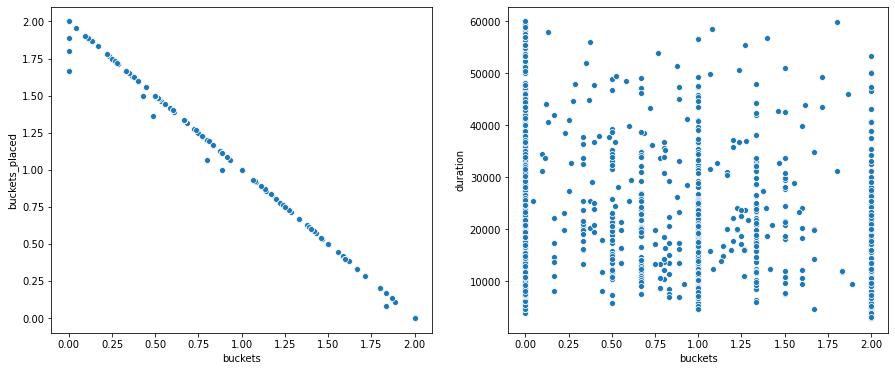

In [ ]:
fig, (ax11, ax12) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.scatterplot(x = 'buckets', y = 'buckets_placed', data = dsTrainMerge[dsTrainMerge['title'] == 'Cauldron Filler (Assessment)'], ax = ax11)

sns.scatterplot(x = 'buckets', y = 'duration', data = dsTrainMerge[dsTrainMerge['title'] == 'Cauldron Filler (Assessment)'], ax = ax12)

plt.show()

Chest Sorter

In [ ]:
dsTrainMerge[dsTrainMerge['title'] == 'Chest Sorter (Assessment)'][['accuracy_group', 'pillars']].groupby('accuracy_group').agg(['mean', 'std']).reset_index()

accuracy_group   pillars          
                      mean       std
0              0  0.548151  0.736543
1              1  1.646520  0.498360
2              2  1.800967  0.400439
3              3  2.000000  0.000000

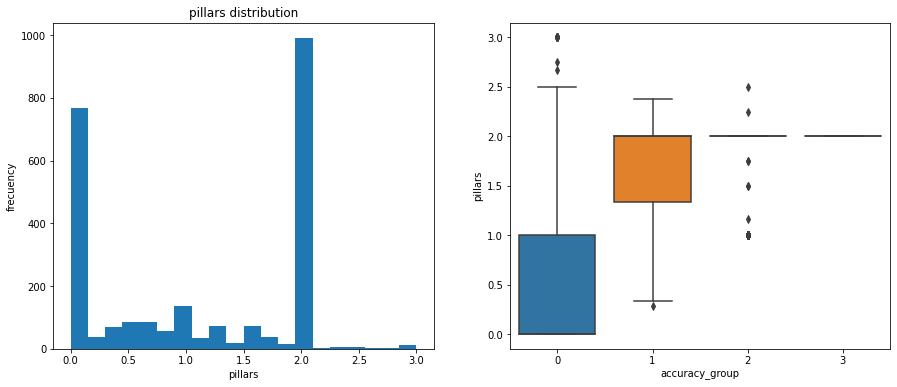

In [ ]:
fig, (ax11, ax12) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax11.hist(dsTrainMerge[dsTrainMerge['title'] == 'Chest Sorter (Assessment)']['pillars'], bins = 20)
ax11.set_xlabel('pillars')
ax11.set_ylabel('frecuency')
ax11.set_title('pillars distribution')

sns.boxplot(x = 'accuracy_group', y = 'pillars', data = dsTrainMerge[dsTrainMerge['title'] == 'Chest Sorter (Assessment)'], ax = ax12)

plt.show()

Cart Balancer

In [ ]:
dsTrainMerge[dsTrainMerge['title'] == 'Cart Balancer (Assessment)'][['accuracy_group', 'left_crystals']].groupby('accuracy_group').agg(['mean', 'std']).reset_index()

accuracy_group left_crystals          
                          mean       std
0              0      2.713822  1.839503
1              1      3.205609  1.238252
2              2      3.408598  1.308926
3              3      4.447102  1.307190

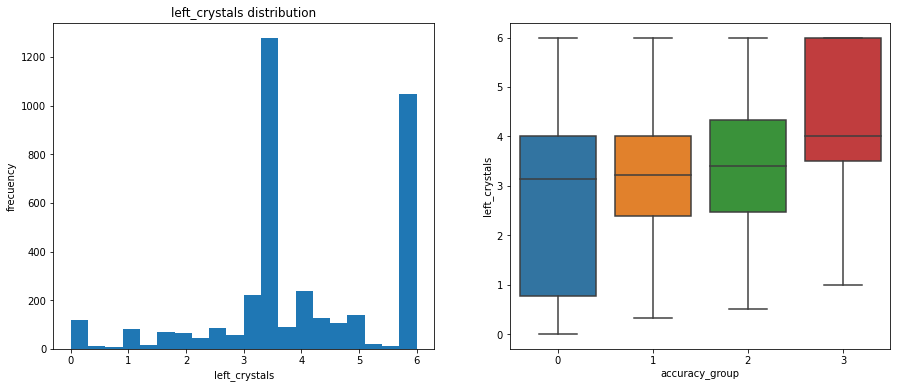

In [ ]:
fig, (ax11, ax12) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax11.hist(dsTrainMerge[dsTrainMerge['title'] == 'Cart Balancer (Assessment)']['left_crystals'], bins = 20)
ax11.set_xlabel('left_crystals')
ax11.set_ylabel('frecuency')
ax11.set_title('left_crystals distribution')

sns.boxplot(x = 'accuracy_group', y = 'left_crystals', data = dsTrainMerge[dsTrainMerge['title'] == 'Cart Balancer (Assessment)'], ax = ax12)

plt.show()

In [ ]:
dsTrainMerge[dsTrainMerge['title'] == 'Cart Balancer (Assessment)'][['accuracy_group', 'right_crystals']].groupby('accuracy_group').agg(['mean', 'std']).reset_index()

accuracy_group right_crystals          
                           mean       std
0              0       2.771778  1.874105
1              1       3.343405  1.194782
2              2       3.534920  1.355508
3              3       4.455839  1.302703

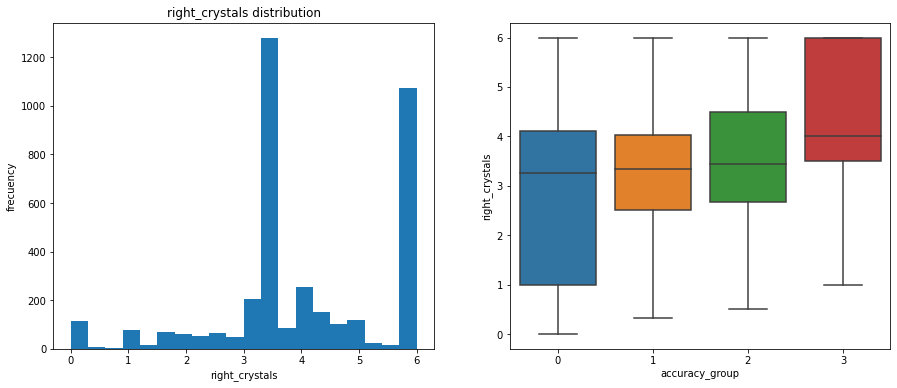

In [ ]:
fig, (ax11, ax12) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax11.hist(dsTrainMerge[dsTrainMerge['title'] == 'Cart Balancer (Assessment)']['right_crystals'], bins = 20)
ax11.set_xlabel('right_crystals')
ax11.set_ylabel('frecuency')
ax11.set_title('right_crystals distribution')

sns.boxplot(x = 'accuracy_group', y = 'right_crystals', data = dsTrainMerge[dsTrainMerge['title'] == 'Cart Balancer (Assessment)'], ax = ax12)

plt.show()

In [ ]:
dsTrainMerge[dsTrainMerge['title'] == 'Cart Balancer (Assessment)'][['left_crystals', 'right_crystals']].corr()

,left_crystals,right_crystals
left_crystals,1.000000,0.812271
right_crystals,0.812271,1.000000


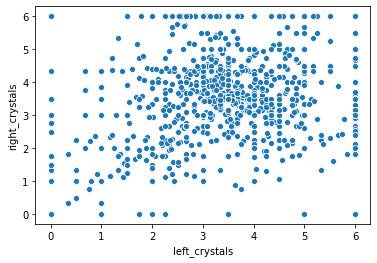

In [ ]:
sns.scatterplot(x = 'left_crystals', y = 'right_crystals', data = dsTrainMerge[dsTrainMerge['title'] == 'Cart Balancer (Assessment)'])

Observations
* All titles have outliers.
* "Cauldron Filler" title has two variables highly correlated, buckets_placed and buckets. So, I will remove one of them (buckets_placed) in order to reduce overfitting.
* "Cart Balancer" title has two variables left_crystals and right_crystals, where their correlation is not clear. So, I will keep both.

In [ ]:
dsTrainMerge = dsTrainMerge[['world', 'title', 'game_time', 'stumps', 'caterpillars', 'pillars', 'buckets', 'duration', 'left_crystals', 'right_crystals', 'accuracy_group']]
print(dsTrainMerge.shape)
dsTrainMerge.head()

(16269, 11)


,world,title,game_time,stumps,caterpillars,pillars,buckets,duration,left_crystals,right_crystals,accuracy_group
1,TREETOPCITY,Bird Measurer (Assessment),13050.0,NaN,5.666667,NaN,NaN,NaN,NaN,NaN,3
2,TREETOPCITY,Bird Measurer (Assessment),28489.0,NaN,5.500000,NaN,NaN,NaN,NaN,NaN,2
3,TREETOPCITY,Bird Measurer (Assessment),12599.0,NaN,5.666667,NaN,NaN,NaN,NaN,NaN,3
4,TREETOPCITY,Bird Measurer (Assessment),32571.0,NaN,10.866667,NaN,NaN,NaN,NaN,NaN,0
5,TREETOPCITY,Bird Measurer (Assessment),22433.5,NaN,6.500000,NaN,NaN,NaN,NaN,NaN,0


### 5.4. Test data

In [ ]:
dsTest = pd.read_csv('/content/test.csv')
print('Shape:', dsTest.shape)
dsTest.head()

Shape: (1156414, 11)


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""game_time"":0,""event_code"":2000}",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


In [ ]:
# Get instances that have had at least one session with type assessment
keepIds = (dsTest[dsTest['type'] == 'Assessment']['installation_id']).drop_duplicates()

# Filter by instances
dsTestAssessment = pd.merge(dsTest, keepIds, how = 'inner', on = 'installation_id')
print(dsTestAssessment.shape)
dsTestAssessment.head()

(1156414, 11)


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""game_time"":0,""event_code"":2000}",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


In [ ]:
# Filter attempts assessments by 4100 and 4110 event code
dsTestAssessment = dsTestAssessment[
    ((dsTestAssessment['type'] == 'Assessment') & (dsTestAssessment['event_code'] == 4100) & (dsTestAssessment['title'] != 'Bird Measurer (Assessment)')) |
    ((dsTestAssessment['type'] == 'Assessment') & (dsTestAssessment['event_code'] == 4110) & (dsTestAssessment['title'] == 'Bird Measurer (Assessment)'))
]
print(dsTestAssessment.shape)
dsTestAssessment.head()

(4492, 11)


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
303,d122731b,8b38fc0d2fd315dc,2019-09-11T18:56:34.661Z,"{""correct"":true,""left"":[{""id"":""gem07"",""weight"":6},{""id"":""gem05"",""weight"":4}],""right"":[{""id"":""gem08"",""weight"":6},{""id"":""gem06"",""weight"":4}],""event_count"":22,""game_time"":22737,""event_code"":4100}",00abaee7,22,4100,22737,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
1561,392e14df,009c890ce6c4f3e3,2019-09-22T21:23:17.737Z,"{""buckets"":[0,0,0],""correct"":false,""buckets_placed"":[3,2,1],""duration"":11474,""event_count"":15,""game_time"":11474,""event_code"":4100}",01242218,15,4100,11474,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
1569,392e14df,009c890ce6c4f3e3,2019-09-22T21:23:26.033Z,"{""buckets"":[0,0,0],""correct"":true,""buckets_placed"":[3,1,2],""duration"":19775,""event_count"":22,""game_time"":19775,""event_code"":4100}",01242218,22,4100,19775,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
1961,d122731b,e8e62de939f916bc,2019-09-22T21:39:06.838Z,"{""correct"":true,""left"":[{""id"":""gem07"",""weight"":6}],""right"":[{""id"":""gem08"",""weight"":6}],""event_count"":9,""game_time"":8504,""event_code"":4100}",01242218,9,4100,8504,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
2333,93b353f2,ab61cae5e3215355,2019-09-22T21:50:51.897Z,"{""correct"":false,""pillars"":[],""event_count"":16,""game_time"":13935,""event_code"":4100}",01242218,16,4100,13935,Chest Sorter (Assessment),Assessment,CRYSTALCAVES


In [ ]:
dsTestAssessment['event_id'].unique()

array(['d122731b', '392e14df', '93b353f2', '25fa8af4', '17113b36'],
      dtype=object)

In [ ]:
dsTestAssessment = dsTestAssessment[['event_id', 'game_session', 'timestamp', 'event_data', 'installation_id', 'game_time', 'title', 'world']]
dsTestAssessment.head()

,event_id,game_session,timestamp,event_data,installation_id,game_time,title,world
303,d122731b,8b38fc0d2fd315dc,2019-09-11T18:56:34.661Z,"{""correct"":true,""left"":[{""id"":""gem07"",""weight"":6},{""id"":""gem05"",""weight"":4}],""right"":[{""id"":""gem08"",""weight"":6},{""id"":""gem06"",""weight"":4}],""event_count"":22,""game_time"":22737,""event_code"":4100}",00abaee7,22737,Cart Balancer (Assessment),CRYSTALCAVES
1561,392e14df,009c890ce6c4f3e3,2019-09-22T21:23:17.737Z,"{""buckets"":[0,0,0],""correct"":false,""buckets_placed"":[3,2,1],""duration"":11474,""event_count"":15,""game_time"":11474,""event_code"":4100}",01242218,11474,Cauldron Filler (Assessment),MAGMAPEAK
1569,392e14df,009c890ce6c4f3e3,2019-09-22T21:23:26.033Z,"{""buckets"":[0,0,0],""correct"":true,""buckets_placed"":[3,1,2],""duration"":19775,""event_count"":22,""game_time"":19775,""event_code"":4100}",01242218,19775,Cauldron Filler (Assessment),MAGMAPEAK
1961,d122731b,e8e62de939f916bc,2019-09-22T21:39:06.838Z,"{""correct"":true,""left"":[{""id"":""gem07"",""weight"":6}],""right"":[{""id"":""gem08"",""weight"":6}],""event_count"":9,""game_time"":8504,""event_code"":4100}",01242218,8504,Cart Balancer (Assessment),CRYSTALCAVES
2333,93b353f2,ab61cae5e3215355,2019-09-22T21:50:51.897Z,"{""correct"":false,""pillars"":[],""event_count"":16,""game_time"":13935,""event_code"":4100}",01242218,13935,Chest Sorter (Assessment),CRYSTALCAVES


In [ ]:
dsTestAssessment['stumps'] = dsTestAssessment['event_data'].apply(getColumnStumps)
dsTestAssessment['caterpillars'] = dsTestAssessment['event_data'].apply(getColumnCaterpillars)
dsTestAssessment['pillars'] = dsTestAssessment['event_data'].apply(getColumnPillars)
dsTestAssessment['buckets'] = dsTestAssessment['event_data'].apply(getColumnBuckets)
dsTestAssessment['buckets_placed'] = dsTestAssessment['event_data'].apply(getColumnBuckets_placed)
dsTestAssessment['duration'] = dsTestAssessment['event_data'].apply(getColumnDuration)
dsTestAssessment['left_crystals'] = dsTestAssessment['event_data'].apply(getLeftColumnCrystals)
dsTestAssessment['right_crystals'] = dsTestAssessment['event_data'].apply(getRightColumnCrystals)
dsTestAssessment['is_successful'] = dsTestAssessment['event_data'].map(lambda x: json.loads(x)['correct'])
print(dsTestAssessment.shape)
dsTestAssessment.head()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


(4492, 17)


,event_id,game_session,timestamp,event_data,installation_id,game_time,title,world,stumps,caterpillars,pillars,buckets,buckets_placed,duration,left_crystals,right_crystals,is_successful
303,d122731b,8b38fc0d2fd315dc,2019-09-11T18:56:34.661Z,"{""correct"":true,""left"":[{""id"":""gem07"",""weight"":6},{""id"":""gem05"",""weight"":4}],""right"":[{""id"":""gem08"",""weight"":6},{""id"":""gem06"",""weight"":4}],""event_count"":22,""game_time"":22737,""event_code"":4100}",00abaee7,22737,Cart Balancer (Assessment),CRYSTALCAVES,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,True
1561,392e14df,009c890ce6c4f3e3,2019-09-22T21:23:17.737Z,"{""buckets"":[0,0,0],""correct"":false,""buckets_placed"":[3,2,1],""duration"":11474,""event_count"":15,""game_time"":11474,""event_code"":4100}",01242218,11474,Cauldron Filler (Assessment),MAGMAPEAK,NaN,NaN,NaN,0.0,2.0,11474.0,NaN,NaN,False
1569,392e14df,009c890ce6c4f3e3,2019-09-22T21:23:26.033Z,"{""buckets"":[0,0,0],""correct"":true,""buckets_placed"":[3,1,2],""duration"":19775,""event_count"":22,""game_time"":19775,""event_code"":4100}",01242218,19775,Cauldron Filler (Assessment),MAGMAPEAK,NaN,NaN,NaN,0.0,2.0,19775.0,NaN,NaN,True
1961,d122731b,e8e62de939f916bc,2019-09-22T21:39:06.838Z,"{""correct"":true,""left"":[{""id"":""gem07"",""weight"":6}],""right"":[{""id"":""gem08"",""weight"":6}],""event_count"":9,""game_time"":8504,""event_code"":4100}",01242218,8504,Cart Balancer (Assessment),CRYSTALCAVES,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,True
2333,93b353f2,ab61cae5e3215355,2019-09-22T21:50:51.897Z,"{""correct"":false,""pillars"":[],""event_count"":16,""game_time"":13935,""event_code"":4100}",01242218,13935,Chest Sorter (Assessment),CRYSTALCAVES,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
dsTestAssessment = dsTestAssessment[['installation_id', 'timestamp', 'game_session', 'world', 'title', 'game_time', 'stumps', 'caterpillars', 'pillars', 'buckets', 'duration', 'left_crystals', 'right_crystals', 'is_successful']]
dsTestAssessment.head()

,installation_id,timestamp,game_session,world,title,game_time,stumps,caterpillars,pillars,buckets,duration,left_crystals,right_crystals,is_successful
303,00abaee7,2019-09-11T18:56:34.661Z,8b38fc0d2fd315dc,CRYSTALCAVES,Cart Balancer (Assessment),22737,NaN,NaN,NaN,NaN,NaN,5.0,5.0,True
1561,01242218,2019-09-22T21:23:17.737Z,009c890ce6c4f3e3,MAGMAPEAK,Cauldron Filler (Assessment),11474,NaN,NaN,NaN,0.0,11474.0,NaN,NaN,False
1569,01242218,2019-09-22T21:23:26.033Z,009c890ce6c4f3e3,MAGMAPEAK,Cauldron Filler (Assessment),19775,NaN,NaN,NaN,0.0,19775.0,NaN,NaN,True
1961,01242218,2019-09-22T21:39:06.838Z,e8e62de939f916bc,CRYSTALCAVES,Cart Balancer (Assessment),8504,NaN,NaN,NaN,NaN,NaN,6.0,6.0,True
2333,01242218,2019-09-22T21:50:51.897Z,ab61cae5e3215355,CRYSTALCAVES,Chest Sorter (Assessment),13935,NaN,NaN,0.0,NaN,NaN,NaN,NaN,False


In [ ]:
# Get last assessment by installation_id
dsTestAssessmentLast = dsTestAssessment[['installation_id', 'timestamp']].groupby('installation_id').max().reset_index()
print(dsTestAssessmentLast.shape)
dsTestAssessmentLast.head()

(557, 2)


,installation_id,timestamp
0,00abaee7,2019-09-11T18:56:34.661Z
1,01242218,2019-09-22T22:28:22.446Z
2,02256298,2019-08-03T10:56:01.631Z
3,027e7ce5,2019-09-23T19:20:12.839Z
4,02a29f99,2019-08-17T18:51:54.601Z


In [ ]:
# Filter by instances
dsTestAssessment = pd.merge(dsTestAssessment, dsTestAssessmentLast, how = 'inner', on = ['installation_id', 'timestamp'])
print(dsTestAssessment.shape)
dsTestAssessment.head()

(557, 14)


,installation_id,timestamp,game_session,world,title,game_time,stumps,caterpillars,pillars,buckets,duration,left_crystals,right_crystals,is_successful
0,00abaee7,2019-09-11T18:56:34.661Z,8b38fc0d2fd315dc,CRYSTALCAVES,Cart Balancer (Assessment),22737,NaN,NaN,NaN,NaN,NaN,5.0,5.0,True
1,01242218,2019-09-22T22:28:22.446Z,597a8839a5a3468d,TREETOPCITY,Bird Measurer (Assessment),34947,NaN,5.666667,NaN,NaN,NaN,NaN,NaN,True
2,02256298,2019-08-03T10:56:01.631Z,fec14d065240b4f6,CRYSTALCAVES,Cart Balancer (Assessment),20104,NaN,NaN,NaN,NaN,NaN,6.0,6.0,True
3,027e7ce5,2019-09-23T19:20:12.839Z,9aefef9dd7269673,TREETOPCITY,Mushroom Sorter (Assessment),40082,3.333333,NaN,NaN,NaN,NaN,NaN,NaN,True
4,02a29f99,2019-08-17T18:51:54.601Z,26dfc547fc03b3dc,MAGMAPEAK,Cauldron Filler (Assessment),38093,NaN,NaN,NaN,0.0,38093.0,NaN,NaN,True


In [ ]:
dsTestAssessment = dsTestAssessment[['installation_id', 'world', 'title', 'game_time', 'stumps', 'caterpillars', 'pillars', 'buckets', 'duration', 'left_crystals', 'right_crystals', 'is_successful']]
dsTestAssessment.head()

,installation_id,world,title,game_time,stumps,caterpillars,pillars,buckets,duration,left_crystals,right_crystals,is_successful
0,00abaee7,CRYSTALCAVES,Cart Balancer (Assessment),22737,NaN,NaN,NaN,NaN,NaN,5.0,5.0,True
1,01242218,TREETOPCITY,Bird Measurer (Assessment),34947,NaN,5.666667,NaN,NaN,NaN,NaN,NaN,True
2,02256298,CRYSTALCAVES,Cart Balancer (Assessment),20104,NaN,NaN,NaN,NaN,NaN,6.0,6.0,True
3,027e7ce5,TREETOPCITY,Mushroom Sorter (Assessment),40082,3.333333,NaN,NaN,NaN,NaN,NaN,NaN,True
4,02a29f99,MAGMAPEAK,Cauldron Filler (Assessment),38093,NaN,NaN,NaN,0.0,38093.0,NaN,NaN,True


## 6. Data preparation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### 6.1. Training data

In [ ]:
x = dsTrainMerge.drop('accuracy_group', axis = 1)
y = dsTrainMerge['accuracy_group']

print('x shape:', x.shape)
print('y shape:', y.shape)

x shape: (16269, 10)
y shape: (16269,)


#### 6.1.1. Transforming numerical data

In [ ]:
x['game_time'] =  MinMaxScaler().fit_transform(x['game_time'].values.reshape(-1, 1))
x['stumps'] =  MinMaxScaler().fit_transform(x['stumps'].values.reshape(-1, 1))
x['caterpillars'] =  MinMaxScaler().fit_transform(x['caterpillars'].values.reshape(-1, 1))
x['pillars'] =  MinMaxScaler().fit_transform(x['pillars'].values.reshape(-1, 1))
x['buckets'] =  MinMaxScaler().fit_transform(x['buckets'].values.reshape(-1, 1))
x['duration'] =  MinMaxScaler().fit_transform(x['duration'].values.reshape(-1, 1))
x['left_crystals'] =  MinMaxScaler().fit_transform(x['left_crystals'].values.reshape(-1, 1))
x['right_crystals'] =  MinMaxScaler().fit_transform(x['right_crystals'].values.reshape(-1, 1))
x.head()

,world,title,game_time,stumps,caterpillars,pillars,buckets,duration,left_crystals,right_crystals
1,TREETOPCITY,Bird Measurer (Assessment),0.198248,NaN,0.466667,NaN,NaN,NaN,NaN,NaN
2,TREETOPCITY,Bird Measurer (Assessment),0.461902,NaN,0.450000,NaN,NaN,NaN,NaN,NaN
3,TREETOPCITY,Bird Measurer (Assessment),0.190547,NaN,0.466667,NaN,NaN,NaN,NaN,NaN
4,TREETOPCITY,Bird Measurer (Assessment),0.531611,NaN,0.986667,NaN,NaN,NaN,NaN,NaN
5,TREETOPCITY,Bird Measurer (Assessment),0.358492,NaN,0.550000,NaN,NaN,NaN,NaN,NaN


Set 0 to missing values in order to avoid problems with the models.

In [ ]:
x = x.fillna(0)
x.head()

,world,title,game_time,stumps,caterpillars,pillars,buckets,duration,left_crystals,right_crystals
1,TREETOPCITY,Bird Measurer (Assessment),0.198248,0.0,0.466667,0.0,0.0,0.0,0.0,0.0
2,TREETOPCITY,Bird Measurer (Assessment),0.461902,0.0,0.450000,0.0,0.0,0.0,0.0,0.0
3,TREETOPCITY,Bird Measurer (Assessment),0.190547,0.0,0.466667,0.0,0.0,0.0,0.0,0.0
4,TREETOPCITY,Bird Measurer (Assessment),0.531611,0.0,0.986667,0.0,0.0,0.0,0.0,0.0
5,TREETOPCITY,Bird Measurer (Assessment),0.358492,0.0,0.550000,0.0,0.0,0.0,0.0,0.0


#### 6.1.2. Transforming categorical data

In [ ]:
x = pd.concat([pd.get_dummies(x[['world', 'title']], drop_first = True), x[['game_time', 'stumps', 'caterpillars', 'pillars', 
                                                                                    'buckets', 'duration', 'left_crystals', 'right_crystals']]], axis = 1)
print(x.shape)
x.head()

(16269, 14)


,world_MAGMAPEAK,world_TREETOPCITY,title_Cart Balancer (Assessment),title_Cauldron Filler (Assessment),title_Chest Sorter (Assessment),title_Mushroom Sorter (Assessment),game_time,stumps,caterpillars,pillars,buckets,duration,left_crystals,right_crystals
1,0,1,0,0,0,0,0.198248,0.0,0.466667,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,0,0.461902,0.0,0.450000,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,0.190547,0.0,0.466667,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,0,0,0.531611,0.0,0.986667,0.0,0.0,0.0,0.0,0.0
5,0,1,0,0,0,0,0.358492,0.0,0.550000,0.0,0.0,0.0,0.0,0.0


### 6.1.3. Get train and val data

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x.values, y.values, test_size=0.1, random_state=0)

print('x_train shape', x_train.shape)
print('x_val shape', x_val.shape)
print('y_train shape', y_train.shape)
print('y_val shape', y_val.shape)

x_train shape (14642, 14)
x_val shape (1627, 14)
y_train shape (14642,)
y_val shape (1627,)


### 6.2. Testing data

#### 6.2.1. Transforming numerical data

In [ ]:
dsTestAssessment['game_time'] =  MinMaxScaler().fit_transform(dsTestAssessment['game_time'].values.reshape(-1, 1))
dsTestAssessment['stumps'] =  MinMaxScaler().fit_transform(dsTestAssessment['stumps'].values.reshape(-1, 1))
dsTestAssessment['caterpillars'] =  MinMaxScaler().fit_transform(dsTestAssessment['caterpillars'].values.reshape(-1, 1))
dsTestAssessment['pillars'] =  MinMaxScaler().fit_transform(dsTestAssessment['pillars'].values.reshape(-1, 1))
dsTestAssessment['buckets'] =  MinMaxScaler().fit_transform(dsTestAssessment['buckets'].values.reshape(-1, 1))
dsTestAssessment['duration'] =  MinMaxScaler().fit_transform(dsTestAssessment['duration'].values.reshape(-1, 1))
dsTestAssessment['left_crystals'] =  MinMaxScaler().fit_transform(dsTestAssessment['left_crystals'].values.reshape(-1, 1))
dsTestAssessment['right_crystals'] =  MinMaxScaler().fit_transform(dsTestAssessment['right_crystals'].values.reshape(-1, 1))
dsTestAssessment.head()

,installation_id,world,title,game_time,stumps,caterpillars,pillars,buckets,duration,left_crystals,right_crystals,is_successful
0,00abaee7,CRYSTALCAVES,Cart Balancer (Assessment),0.006348,NaN,NaN,NaN,NaN,NaN,0.833333,0.833333,True
1,01242218,TREETOPCITY,Bird Measurer (Assessment),0.010373,NaN,0.466667,NaN,NaN,NaN,NaN,NaN,True
2,02256298,CRYSTALCAVES,Cart Balancer (Assessment),0.005479,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,True
3,027e7ce5,TREETOPCITY,Mushroom Sorter (Assessment),0.012067,0.833333,NaN,NaN,NaN,NaN,NaN,NaN,True
4,02a29f99,MAGMAPEAK,Cauldron Filler (Assessment),0.011411,NaN,NaN,NaN,0.0,0.07515,NaN,NaN,True


In [ ]:
dsTestAssessment = dsTestAssessment.fillna(0)
dsTestAssessment.head()

,installation_id,world,title,game_time,stumps,caterpillars,pillars,buckets,duration,left_crystals,right_crystals,is_successful
0,00abaee7,CRYSTALCAVES,Cart Balancer (Assessment),0.006348,0.000000,0.000000,0.0,0.0,0.00000,0.833333,0.833333,True
1,01242218,TREETOPCITY,Bird Measurer (Assessment),0.010373,0.000000,0.466667,0.0,0.0,0.00000,0.000000,0.000000,True
2,02256298,CRYSTALCAVES,Cart Balancer (Assessment),0.005479,0.000000,0.000000,0.0,0.0,0.00000,1.000000,1.000000,True
3,027e7ce5,TREETOPCITY,Mushroom Sorter (Assessment),0.012067,0.833333,0.000000,0.0,0.0,0.00000,0.000000,0.000000,True
4,02a29f99,MAGMAPEAK,Cauldron Filler (Assessment),0.011411,0.000000,0.000000,0.0,0.0,0.07515,0.000000,0.000000,True


#### 6.2.2. Transforming categorical data

In [ ]:
dsTestAssessment = pd.concat([pd.get_dummies(dsTestAssessment[['world', 'title']], drop_first = True), dsTestAssessment[['installation_id', 'game_time', 'stumps', 'caterpillars', 'pillars', 
                                                                                    'buckets', 'duration', 'left_crystals', 'right_crystals']]], axis = 1)
print(dsTestAssessment.shape)
dsTestAssessment.head()

(557, 15)


,world_MAGMAPEAK,world_TREETOPCITY,title_Cart Balancer (Assessment),title_Cauldron Filler (Assessment),title_Chest Sorter (Assessment),title_Mushroom Sorter (Assessment),installation_id,game_time,stumps,caterpillars,pillars,buckets,duration,left_crystals,right_crystals
0,0,0,1,0,0,0,00abaee7,0.006348,0.000000,0.000000,0.0,0.0,0.00000,0.833333,0.833333
1,0,1,0,0,0,0,01242218,0.010373,0.000000,0.466667,0.0,0.0,0.00000,0.000000,0.000000
2,0,0,1,0,0,0,02256298,0.005479,0.000000,0.000000,0.0,0.0,0.00000,1.000000,1.000000
3,0,1,0,0,0,1,027e7ce5,0.012067,0.833333,0.000000,0.0,0.0,0.00000,0.000000,0.000000
4,1,0,0,1,0,0,02a29f99,0.011411,0.000000,0.000000,0.0,0.0,0.07515,0.000000,0.000000


## 7. Modeling
The goal of this stage is to create models to predict target variable.

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn import metrics

from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import tree
from sklearn import svm

from sklearn.model_selection import RandomizedSearchCV

### 7.1. Metrics
I will use the following metrics:
* **Accuracy**: I want to know how good is the model predicting.
* **Confusion matrix**: I want to know number of correct prediction and bad prediction. It is useful to measure imbalance class.
* **F1-score**: it is useful to measure how good a model is based on a combination of precision and recall.

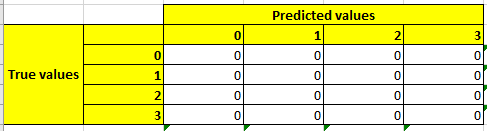

### 7.2. Models

In [ ]:
x_val.shape

(1627, 14)

#### 7.2.1. Naive bayes model

In [ ]:
clf = MultinomialNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_val)
acc = metrics.accuracy_score(y_val, y_pred)
cfm = metrics.confusion_matrix(y_val, y_pred)
f1 = metrics.f1_score(y_val, y_pred, average = 'weighted')

print('Accuracy:', acc)
print('F1-score:', f1)

Accuracy: 0.6060233558696988
F1-score: 0.5423952603736496


In [ ]:
cfm

array([[197,   0,  24, 134],
       [ 94,   0,  27,  70],
       [ 55,   0,  21, 133],
       [104,   0,   0, 768]])

#### 7.2.2. Decision trees model

In [ ]:
modelTree = tree.DecisionTreeClassifier()
modelTree.fit(x_train, y_train)
y_pred = modelTree.predict(x_val)
acc = metrics.accuracy_score(y_val, y_pred)
cfm = metrics.confusion_matrix(y_val, y_pred)
f1 = metrics.f1_score(y_val, y_pred, average = 'weighted')

print('Accuracy:', acc)
print('F1-score:', f1)

Accuracy: 0.693300553165335
F1-score: 0.6957499778553814


In [ ]:
# Confusion matrix
cfm

array([[243,  49,  32,  31],
       [ 52,  80,  21,  38],
       [ 40,  25,  85,  59],
       [ 29,  42,  81, 720]])

### 7.2.3. Support vector machine - Classification

In [ ]:
svc = svm.SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc = metrics.accuracy_score(y_val, y_pred)
cfm = metrics.confusion_matrix(y_val, y_pred)
f1 = metrics.f1_score(y_val, y_pred, average = 'weighted')

print('Accuracy:', acc)
print('F1-score:', f1)

Accuracy: 0.690842040565458
F1-score: 0.6408477750545345


In [ ]:
cfm

array([[204,  26,   4, 121],
       [ 20,  58,   9, 104],
       [  6,  19,  16, 168],
       [  6,  20,   0, 846]])

LinearSVC

In [ ]:
linSvc = svm.LinearSVC()
linSvc.fit(x_train, y_train)
y_pred = linSvc.predict(x_val)
acc = metrics.accuracy_score(y_val, y_pred)
cfm = metrics.confusion_matrix(y_val, y_pred)
f1 = metrics.f1_score(y_val, y_pred, average = 'weighted')

print('Accuracy:', acc)
print('F1-score:', f1)

Accuracy: 0.6607252612169637
F1-score: 0.5903318239608569


In [ ]:
cfm

array([[196,  26,   0, 133],
       [ 61,  39,   0,  91],
       [ 34,  12,   0, 163],
       [ 17,  15,   0, 840]])

Conclusions:

The model using decision trees is the best, its f1-score and accuracy are better than other models.

### 7.3. Predict using test data
To predict new values I will use the best model (best metrics).

In [ ]:
x_test = dsTestAssessment.drop('installation_id', axis=1).values
print('Shape:', x_test.shape)

Shape: (557, 14)


In [ ]:
y_predTest = modelTree.predict(x_test)

In [ ]:
y_predTest

array([3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3,
       3, 3, 0, 3, 1, 3, 3, 1, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3,
       0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3,
       3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 2, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3,
       3, 3, 0, 0, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0, 0, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1,
       0, 3, 3, 2, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
dsSubmission = pd.DataFrame({'installation_id': dsTestAssessment['installation_id'].values, 'accuracy_group': y_predTest})
dsSubmission.head()

,installation_id,accuracy_group
0,00abaee7,3
1,01242218,3
2,02256298,3
3,027e7ce5,3
4,02a29f99,0


In [ ]:
dsSubmission.to_csv(index=False)

'installation_id,accuracy_group\n00abaee7,3\n01242218,3\n02256298,3\n027e7ce5,3\n02a29f99,0\n03e33699,3\n04d31500,3\n0512bf0e,3\n05771bba,3\n05b82cf5,0\n0617500d,3\n07749e99,3\n08611cc8,0\n090fe325,3\n0937340d,0\n09aaaf83,3\n09aefe80,3\n0a126293,3\n0a2a77b2,0\n0b24b6ac,0\n0b607c82,3\n0d735146,3\n0d7752d3,3\n0dd670e9,3\n0e514571,3\n0e718764,0\n0ea27b66,0\n0f7116a6,0\n101d16f5,3\n10acf963,3\n1121f331,3\n1181ce7c,3\n12771ee9,0\n13629687,3\n13bcaf23,0\n140087ce,3\n1594c19e,3\n15ec4544,3\n15f9b137,0\n16160dde,3\n163ffbd7,3\n18569185,0\n18a43ba3,3\n18dd112c,3\n1962067f,3\n1a20a79d,3\n1b38b81a,0\n1b3987c8,3\n1b5d84df,1\n1b6ecb54,3\n1baa3c99,3\n1d2eae73,1\n1dd31d7c,0\n1df0bdd4,3\n1e8622da,3\n1ed372f8,3\n1ed78db3,0\n1f8bf570,3\n20244184,3\n20ade427,3\n210c8bc0,3\n225505b3,0\n229464d8,3\n23f2ef8f,0\n253ac98f,3\n2569a283,3\n25914d08,0\n26ae75a7,3\n26b5e264,3\n2721167a,0\n274f2012,0\n2777912c,0\n285b65c8,3\n28badbc7,3\n293c26ac,3\n29d19d88,0\n29feed5c,3\n2a47e474,3\n2a6b9553,0\n2ae57465,3\n2af16b0